# **Control práctico**

**Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Marzo 2024

***

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
import scipy
import math

## Ejercicio 1: Manipulación

> Crea una máscara con el mismo tamaño, canales y tipo de dato que la imagen `pez.jpg`. Inicialmente la máscara se inicializa con ceros.
>
> Escribe sobre la máscara tu nombre usando la función `cv2.putText` en blanco. El nombre debe estar centrado respecto a la imagen, para lo que se necesitará utilizar `cv2.getTextSize`.
>
> Modifica la imagen `pez.jpg`, poniendo en color rojo todos aquellos píxeles donde la máscara tuviera cero.

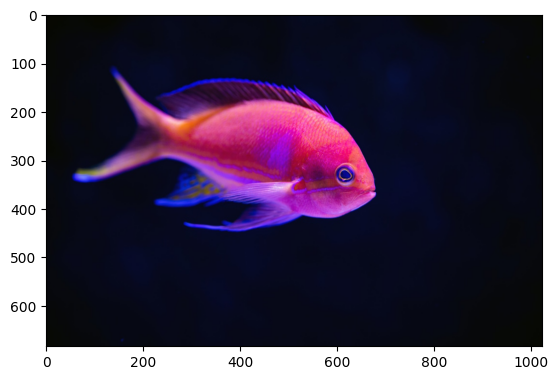

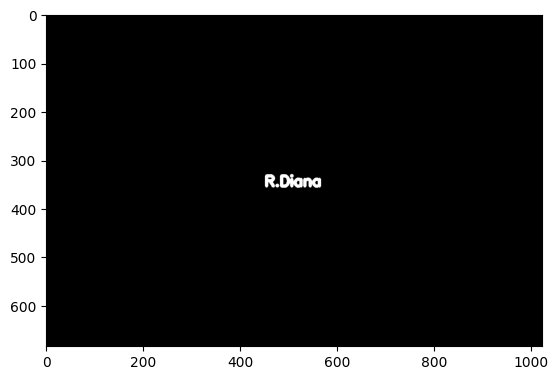

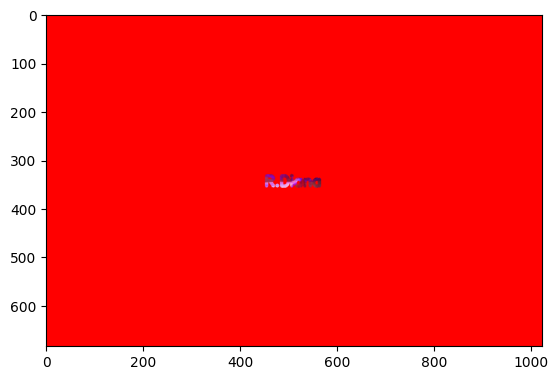

In [3]:
img = skimage.io.imread('pez.jpg')
mask = np.zeros_like(img, dtype=np.uint8)
import cv2
import numpy as np

img = skimage.io.imread('pez.jpg')
mask = np.zeros_like(img, dtype=np.uint8)
# Crear una máscara con el mismo tamaño y tipo de dato que la imagen, inicializada con ceros
mask = np.zeros_like(img, dtype=np.uint8)

# Configurar el nombre y la fuente para la máscara
name = "R.Diana"
font = cv2.FONT_HERSHEY_SIMPLEX  #Representa el tipo de fuente que se utilizará para el texto
font_scale = 1  # Es el factor de escala para el tamaño de la fuente.
font_thickness = 5  #grosor del texto

# Obtener el tamaño del texto para centrarlo
text_size, _ = cv2.getTextSize(name, font, font_scale, font_thickness)
x = (mask.shape[1] - text_size[0]) // 2
y = (mask.shape[0] + text_size[1]) // 2
#text_size[0]: Es el ancho del texto.
#text_size[1]: Es el alto del texto.
#mask.shape[0]: Es la altura de la imagen (número de filas).
#mask.shape[1]: Es el ancho de la imagen (número de columnas).

# Escribir el nombre blanco sobre la máscara
cv2.putText(mask, name, (x, y), font, font_scale, (255, 255, 255), font_thickness)

# Modificar la imagen original, poniendo a color negro donde la máscara tiene cero
result = np.where(mask == 255, img, [255,0,0])


plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(result)
plt.show()


## Ejercicio 2: Contraste

> Carga la imagen `hola.png` y realiza la normalización minmax para ajustar el contraste.
>
> Visualiza el resultado

ENTRE [0,1]


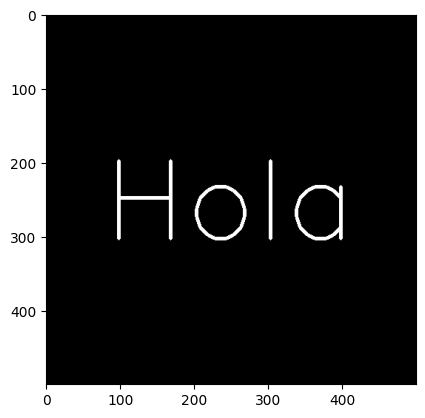

ENTRE [0,255]


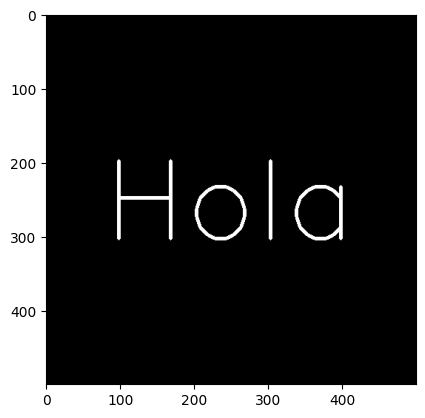

CON PERCENTILES 2 Y 98


C:\Users\rebec\AppData\Local\Temp\ipykernel_5184\3307939902.py:30: RuntimeWarning: divide by zero encountered in divide
  norm_channel = (channel - channel_min) / (channel_max - channel_min)
C:\Users\rebec\AppData\Local\Temp\ipykernel_5184\3307939902.py:30: RuntimeWarning: invalid value encountered in divide
  norm_channel = (channel - channel_min) / (channel_max - channel_min)
c:\Users\rebec\Vision_Artificial\entorno\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


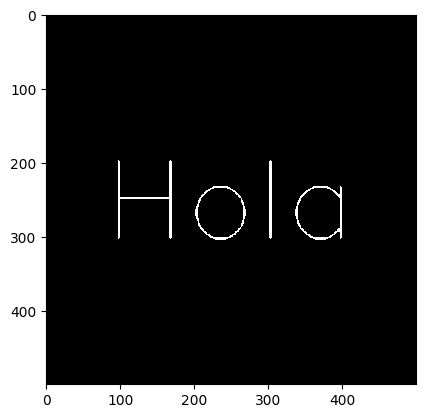

In [4]:
def normalizacion(img,percentil_min=None,percentil_max=None):
    if img.ndim == 2:
        img=img.astype(np.float64)
        if percentil_min==None and percentil_max==None:
            
            r_min = np.min(img)
            r_max = np.max(img)
            # Aplicar la fórmula de min-max normalization
            norm=(img - r_min) / (r_max - r_min)
            image=np.clip(norm, 0, 1)
        else:
            r_min=np.percentile(img,percentil_min)
            r_max=np.percentile(img,percentil_max)
            norm=(img - r_min) / (r_max - r_min)
            image=np.clip(norm, 0, 1)
        return image
    if img.ndim == 3:
        norm= np.zeros_like(img, dtype=np.float32)
        for i in range(img.shape[-1]):
            channel = img[:, :, i]
            if percentil_min==None and percentil_max==None:
                channel_min = np.min(channel)
                channel_max = np.max(channel)
                norm_channel = (channel - channel_min) / (channel_max - channel_min)
                norm_channel = np.clip(norm_channel, 0, 1)
                norm[:, :, i] = norm_channel
            else:
                channel_min=np.percentile(img,percentil_min)
                channel_max=np.percentile(img,percentil_max)
                norm_channel = (channel - channel_min) / (channel_max - channel_min)
                norm_channel = np.clip(norm_channel, 0, 1)
                norm[:, :, i] = norm_channel

        return norm
    

img = skimage.io.imread('hola.png')
img2=normalizacion(img)
print("ENTRE [0,1]")
plt.imshow(img2)
plt.show()
norm=normalizacion(img)
norm = (norm * 255).astype(np.uint8)
print("ENTRE [0,255]")
plt.imshow(norm)
plt.show()
print("CON PERCENTILES 2 Y 98")
percent=normalizacion(img,2,98)
plt.imshow(percent)
plt.show()

## Ejercicio 3: Imágenes híbridas

> Añade el código y las imágenes usadas para realizar el ejercicio de las imágenes híbridas.
> Visualiza el resultado

In [5]:
def paso_alto(img):
    if img.ndim == 2:
        # Convertir a formato real en el rango [0, 1]
        img = img / 255.0
        # Desviación estándar de la distribución Gaussiana
        sigma = 1
        # Calcula la convolución de la imagen con un kernel Gaussiano
        blurred_image = scipy.ndimage.gaussian_filter(img, sigma)
        # Operación de Unsharp Masking para cada canal
        sharpened_image =(img - blurred_image) 
        # Asegurar que el resultado esté en el rango [0, 1]
        sharpened_image = np.clip(sharpened_image, 0, 1)
        # Devolver la imagen al rango [0, 255] y convertir a np.uint8
        sharpened_image = (sharpened_image * 255).astype(np.uint8)
        return sharpened_image
    elif img.ndim == 3:
        for i in range(img.shape[-1]):
            # Convertir a formato real en el rango [0, 1]
            channel = img[:, :, i] / 255.0
            # Desviación estándar de la distribución Gaussiana
            sigma = 1
            # Calcula la convolución de la imagen con un kernel Gaussiano
            blurred_channel = scipy.ndimage.gaussian_filter(channel, sigma)
            # Operación de Unsharp Masking para cada canal
            sharpened_channel =  (channel - blurred_channel) 
            # Asegurar que el resultado esté en el rango [0, 1]
            sharpened_channel = np.clip(sharpened_channel, 0, 1)
            # Devolver el canal al rango [0, 255] y convertir a np.uint8
            img[:, :, i] = (sharpened_channel * 255).astype(np.uint8)
    return img


(358, 422)
(358, 422)


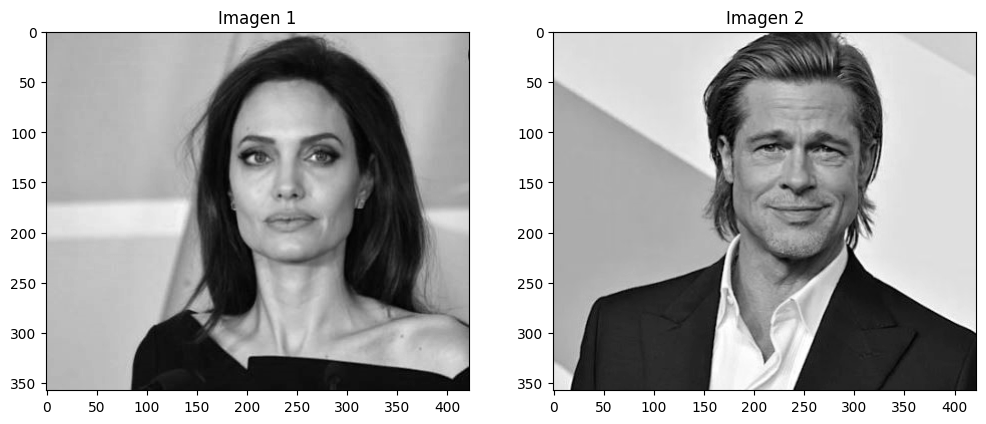

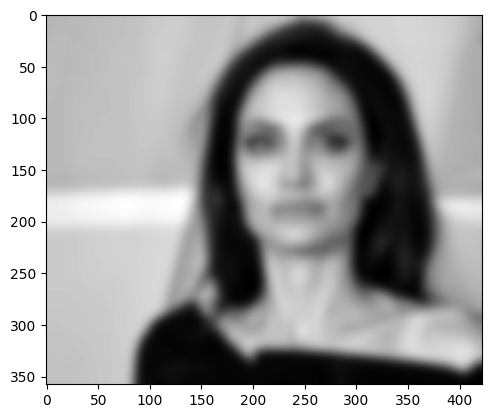

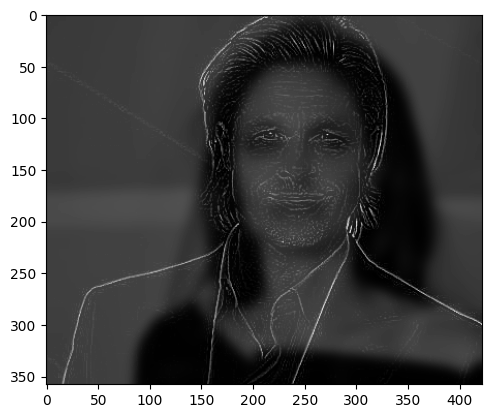

In [6]:
img1 = cv2.imread('angelina.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('brad.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

print(img1.shape)
print(img2.shape)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap="gray")
plt.title('Imagen 1')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap="gray")  
plt.title('Imagen 2')

plt.show()

#PASO BAJO: GAUSSIANDA--SUAVIZADA

#PASO ALTO: (ORIGINAL-SUAVIZADA)-CONVOLUCIÓN
#PASO BAJO
sigma=5
img1_gaus = scipy.ndimage.gaussian_filter(img1, (sigma,sigma))
plt.imshow(img1_gaus, cmap="gray")
plt.show()

#PASO ALTO:

img2_paso_alto =paso_alto(img2)
plt.imshow(img2_paso_alto, cmap="gray")
img1_gaus=img1_gaus/255.0
img2_paso_alto=img2_paso_alto/255.0
parametro1=0.14
parametro2=0.86
img3 = img1_gaus*parametro1 + img2_paso_alto*parametro2
img3=np.clip(img3,0,1)
(img3*255).astype(np.uint8)
plt.imshow(img3, cmap="gray")

## Ejercicio 4: Afilado

> Carga la imagen `ojo.png` y realiza el afilado con sigma 7 y fuerza 2.
>
> Visualiza el resultado

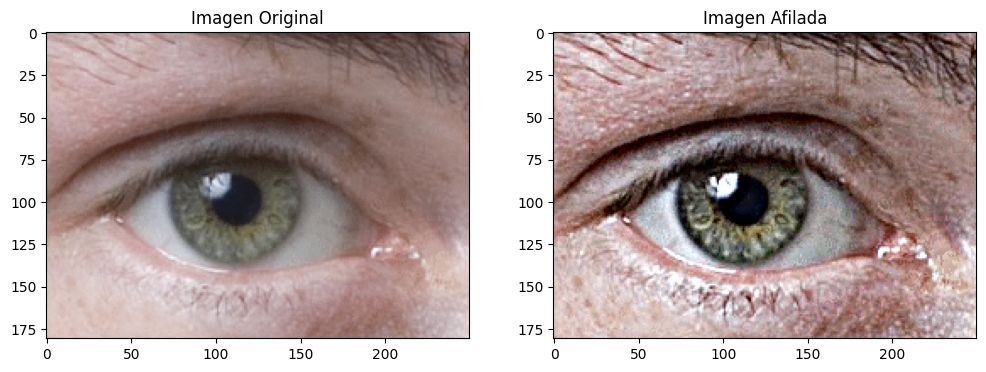

In [7]:
def afilado(img, strength=2):
    if img.ndim == 2:
        # Convertir a formato real en el rango [0, 1]
        img = img / 255.0
        # Desviación estándar de la distribución Gaussiana
        sigma = 7
        # Calcula la convolución de la imagen con un kernel Gaussiano
        blurred_image = scipy.ndimage.gaussian_filter(img, sigma)
        # Operación de Unsharp Masking para cada canal
        sharpened_image = img + (img - blurred_image) * strength
        # Asegurar que el resultado esté en el rango [0, 1]
        sharpened_image = np.clip(sharpened_image, 0, 1)
        # Devolver la imagen al rango [0, 255] y convertir a np.uint8
        sharpened_image = (sharpened_image * 255).astype(np.uint8)
            
    elif img.ndim == 3:
        for i in range(img.shape[-1]):
            # Convertir a formato real en el rango [0, 1]
            channel = img[:, :, i] / 255.0
            # Desviación estándar de la distribución Gaussiana
            sigma = 5 
            # Calcula la convolución de la imagen con un kernel Gaussiano
            blurred_channel = scipy.ndimage.gaussian_filter(channel, sigma)
            # Operación de Unsharp Masking para cada canal
            sharpened_channel = channel + (channel - blurred_channel) * strength
            # Asegurar que el resultado esté en el rango [0, 1]
            sharpened_channel = np.clip(sharpened_channel, 0, 1)
            # Devolver el canal al rango [0, 255] y convertir a np.uint8
            img[:, :, i] = (sharpened_channel * 255).astype(np.uint8)
    return img



img = skimage.io.imread('ojo.png')

# Visualizar la imagen original y la imagen afilada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen Original')
sharpened_image=afilado(img)
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title('Imagen Afilada')

plt.show()

## Ejercicio 5: Bordes

> Carga la imagen `girl.png` y realiza la detección de bordes usando la primera derivada de la gaussiana (sigma=1)
>
> Visualiza la imagen original y realiza una superposición en color rojo de aquellos bordes cuya magnitud de gradiente sea superior a 0.25 multiplicado por el gradiente máximo.


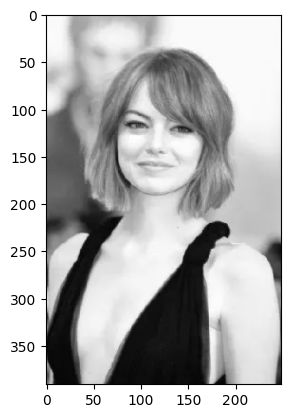

3


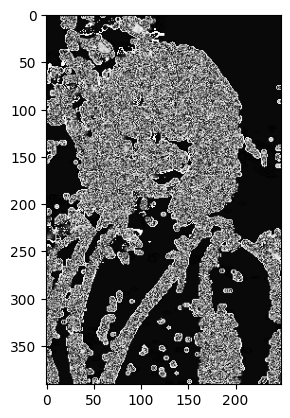

[[  0  16]
 [  0  17]
 [  0  18]
 ...
 [390 242]
 [390 245]
 [390 246]]


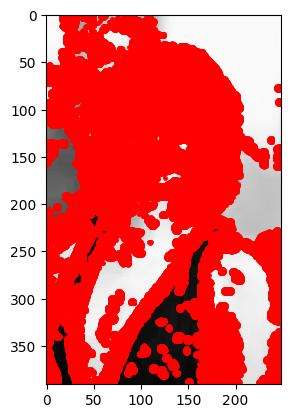

[[  0  92]
 [  4  38]
 [ 50  50]
 [ 52 133]
 [ 73 185]
 [ 74   7]
 [ 91 103]
 [109  36]
 [117 160]
 [137 118]
 [144 243]
 [151   6]
 [179 184]
 [187  33]
 [192  96]
 [216 136]
 [228 185]
 [230  53]
 [249  99]
 [255  11]
 [256 221]
 [268 148]
 [294  74]
 [316 154]
 [339 239]
 [349 103]
 [349 195]
 [367   3]
 [386  46]
 [140  72]
 [386 234]
 [300  20]
 [340  54]
 [385 162]
 [ 90 247]
 [294 195]
 [114 205]
 [293 247]]


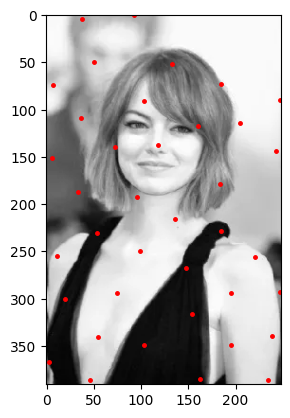

In [31]:
img = skimage.io.imread('girl.png')
plt.imshow(img)
plt.show()
print(img.ndim)
img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def compute_harris_response(img,sigma=3,k=0.04):
    if img.ndim ==2:
        
        # Calcula la convolución de la imagen con la derivada del kernel Gaussiano en x
        imx = scipy.ndimage.gaussian_filter(img, (sigma,sigma), (0,1))
        # Calcula la convolución de la imagen con la derivada del kernel Gaussiano en y
        imy = scipy.ndimage.gaussian_filter(img, (sigma,sigma), (1,0))
        
        # Calcula los productos de las derivadas
        Gxx = scipy.ndimage.gaussian_filter(imx**2, sigma)
        Gyy = scipy.ndimage.gaussian_filter(imy**2, sigma)
        Gxy = scipy.ndimage.gaussian_filter(imx * imy, sigma)
        # Calcula el determinante y la traza de la matriz de Harris
        det = Gxx * Gyy - Gxy**2
        tr = Gxx + Gyy
        # Calcula la función de respuesta de Harris
        R = det - k * (tr**2)
        return R
    else:
        print("La imagen debe ser de dimensión 2")
        return
R=compute_harris_response(img,sigma=1)
plt.imshow(R, cmap='gray')
plt.show()

threshold = 0.25

corners = np.argwhere(R > threshold * R.max())

plt.imshow(img, cmap='gray')
corners = np.array(corners)
print(corners)
plt.plot(corners[:, 1], corners[:, 0], '.', markersize=5,color="red")
plt.show()
def non_max_suppression(corners,R,distance_threshold):
    selected_corners=[]
    corners =sorted(corners,key=lambda x: R[x[0],x[1]],reverse=True)
    for corner in corners:
        distances = [np.linalg.norm(np.array(corner) - np.array(selected)) for selected in selected_corners]
    
        if np.count_nonzero(np.array(distances) < distance_threshold) == 0:
            selected_corners.append(corner)
    return selected_corners

corners=non_max_suppression(corners,R=R,distance_threshold=45) #cuanto más threshold, detectará menos esquinas
#cuanto más pequeño, más esquinas detectará
plt.imshow(img, cmap='gray')
corners = np.array(corners)
print(corners)
plt.plot(corners[:, 1], corners[:, 0], '.', markersize=5,color="red")
plt.show()

## Ejercicio 6: Transformación

> Carga la imagen `ojo.png` y realiza una transformación combinada con el siguiente orden: escalado (5x, 2y), después rotación (pi/4), después traslación (20x, 10y).
>
> Visualiza el resultado

In [9]:
def de2D_coordenadas_homogeneas(a):
    if len(a)!=2:
        print("El array no tiene solamente dos filas")
        return
    N=a.shape[1]
    b=a.copy()
    homo= np.vstack((b, np.ones(N)))
    return homo

In [10]:
import numpy as np
import skimage
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt


def transform_image(img, matrix, num_points):
    # Obtener las esquinas de la imagen
    superior_izquierda = [0, 0]
    superior_derecha = [img.shape[1] - 1, 0]
    inferior_izquierda = [0, img.shape[0] - 1]
    inferior_derecha = [img.shape[1] - 1, img.shape[0] - 1]
    esquinas = np.array([superior_izquierda, superior_derecha, inferior_izquierda, inferior_derecha]).T
    
    coor_homo=de2D_coordenadas_homogeneas(esquinas)

    # Aplicar la transformación a las coordenadas homogéneas
    trans = np.dot(matrix, coor_homo)
    
    # Determinar los límites mínimos y máximos de las esquinas transformadas
    xmin = np.min(trans[0])
    xmax = np.max(trans[0])
    ymin = np.min(trans[1])
    ymax = np.max(trans[1])

    # Crear array de puntos entre el min y el max
    x_points = np.linspace(xmin, xmax, num_points)
    y_points = np.linspace(ymin, ymax, num_points)

    # Crear grid bidimensional usando np.meshgrid
    x_grid, y_grid = np.meshgrid(x_points, y_points)
    
    # Calcular las coordenadas inversas transformadas
    inverse_transformed_coords = np.linalg.inv(matrix) @ np.vstack([x_grid.flatten(), y_grid.flatten(), np.ones_like(x_grid.flatten())])
    inverse_transformed_coords = inverse_transformed_coords[:2] / inverse_transformed_coords[2]
    # Reorganizar las coordenadas para map_coordinates
    coords = np.vstack((inverse_transformed_coords[1, :], inverse_transformed_coords[0, :]))

    # Reinterpretar la imagen en las coordenadas transformadas
    warped = np.zeros((num_points, num_points, img.shape[2]), dtype=img.dtype)
    for channel in range(img.shape[2]):
        warped[:,:,channel] = map_coordinates(img[:,:,channel], coords, order=3, mode='constant').reshape((num_points, num_points))

    extent = [xmin, xmax, ymax, ymin]

    return warped, extent




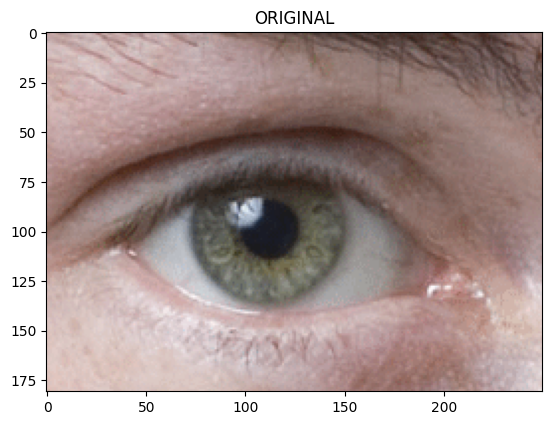

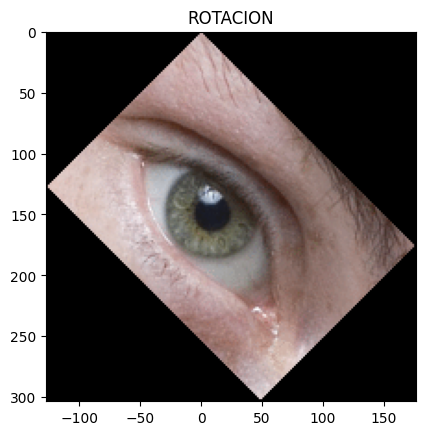

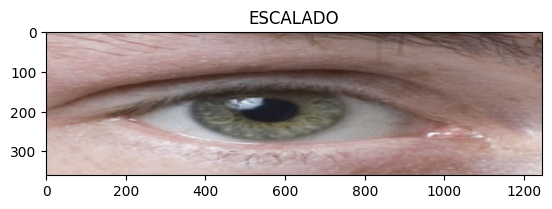

In [34]:
img = skimage.io.imread("ojo.png")

dx = 20  # traslación en el eje x
dy = 10  # traslación en el eje y
traslacion = np.array([[1, 0, dx],
                   [0, 1, dy],
                   [0, 0, 1]])

warped,extent=transform_image(img, traslacion, 200)
plt.imshow(img)
plt.title("ORIGINAL")
plt.show()  

# Crear la matriz de transformación de inclinación
# Ángulo de rotación en radianes
angulo_radianes = math.pi/4

# Matriz de rotación
rotacion = np.array([
    [np.cos(angulo_radianes), -np.sin(angulo_radianes), 0],
    [np.sin(angulo_radianes), np.cos(angulo_radianes), 0],
    [0, 0, 1]
])

warped,extent=transform_image(img, rotacion, 200)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("ROTACION")
plt.show()
# Factores de escala
sx = 5  # Escala en dirección x
sy = 2  # Escala en dirección y

# Matriz de escala
escalado = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])
warped,extent=transform_image(img, escalado, 200)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("ESCALADO")
plt.show()

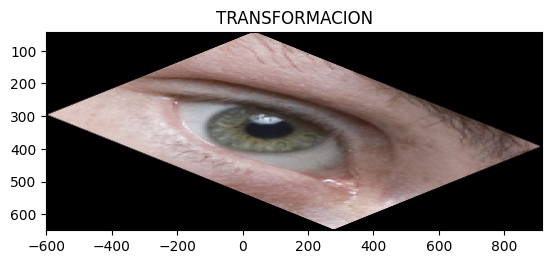

In [35]:
escalado_rotacion=np.dot(escalado,rotacion)
es_rot_traslacion=np.dot(escalado_rotacion,traslacion)
warped,extent=transform_image(img, es_rot_traslacion, 200)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("TRANSFORMACION")
plt.show()